<h1> KP I

<h4> Essential Libraries </h4>

In [2]:
# --------------------/
%matplotlib inline
# --------------------/
import h5py
import numpy as np
import matplotlib.pyplot as plt

from pylab import *
from scipy import *
from ipywidgets import *
from mpl_toolkits.mplot3d import axes3d

<h4> Data </h4>

In [66]:
# --------------------/
# parameters

m = 200
n = 2068

snap = 50
name = 'kp.h5'

# --------------------/

u = np.zeros((m, m, n))

# --------------------/
# data

with h5py.File(name,'r') as hf:
    
    x = np.array( hf.get('coordinates/x') )
    y = np.array( hf.get('coordinates/y') )
    
    hf.close()
    
# --------------------/
j = 0
with h5py.File(name,'r') as hf:
    
    for i in range(0, n):
        
        if (i % snap == 0):
            
            u[:,:,j] = np.array( hf.get('u_' + str(i)) )
            j += 1
    
    hf.close()
    

<h4> Wire Frame </h4>

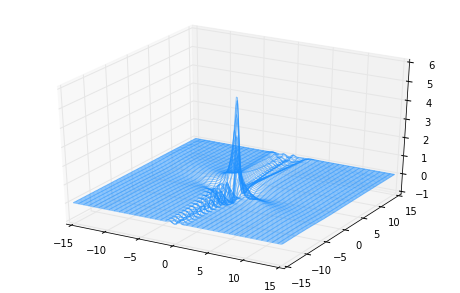

In [67]:
# --------------------/
# plots

def evolution(step):
     
    fig = plt.figure(figsize=(8,5))
    axe = fig.add_subplot(111, projection='3d')
    axe.plot_wireframe(x, y, u[:,:,step], alpha=0.5, color='dodgerblue', rstride=2, cstride=5)
    axe.grid(color='lightgray', alpha=0.5)
    axe.set_xlim(x.min() - 0.125, x.max() + 0.125)
    axe.set_ylim(y.min() - 0.125, y.max() + 0.125)
    #axe.set_zlim(-2.125, 2.125)

# --------------------/
# interactive plot

step = widgets.IntSlider(min=0, max=j, description='step')
interact(evolution, step=step)


<h4> Density </h4>

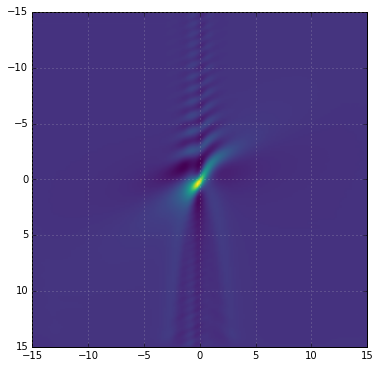

In [68]:
# --------------------/
# plots

from matplotlib.colors import LogNorm

# --------------------/

def evolution(step):
     
    """
    CHOOSING A COLOR MAP
    prism      Accent
    viridis    Pastel1
    inferno    Pastel2
    magma      spring
    plasma     cool
    Accent     winter
    
    """
    
    fig = plt.figure(figsize=(6,6))
    plt.imshow(
        u[:,:,step],
        cmap=plt.cm.viridis, 
        extent=(np.amin(x), np.amax(x), np.amax(y), np.amin(y)),
    )
    plt.grid(color='lightgray', alpha=0.75)


# --------------------/
# interactive plot

step = widgets.IntSlider(min=0, max=j-1, description='step')
interact(evolution, step=step)



<h4> Contour </h4>

In [ ]:
# --------------------/
# plots

def evolution(step):
     
    fig = plt.figure(figsize=(6,6))
    plt.contourf(x, y, u[:,:,step], alpha=0.5, cmap=plt.cm.winter)
    plt.grid(color='lightgray', alpha=0.75)


# --------------------/
# interactive plot

step = widgets.IntSlider(min=0, max=j, description='step')
interact(evolution, step=step)



<h4> Laboratory

(-20.125, 20.125)

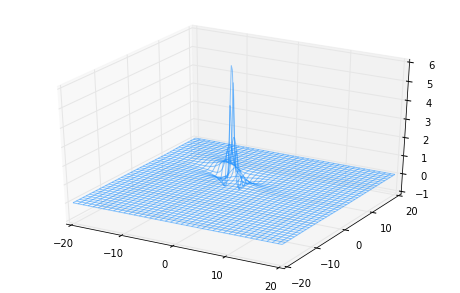

In [72]:
a = -20.0
b =  20.0
m = 200

def f(x, y, t, l, m):
    
    #p = ( -(x - x0)**2 + r**2 * (y - y0)**2 + r**(-2) )
    #q = (  (x - x0)**2 + r**2 * (y - y0)**2 + r**(-2) )**2
    
    p =  -( x + l*y + 3*(l**2 - m**2)*t )**2  + m**2 * (y - 6*l*t )**2 + m**(-2)
    q = ( ( x + l*y + 3*(l**2 - m**2)*t )**2  + m**2 * (y - 6*l*t )**2 + m**(-2) )**2

    
    return 4.0 * p / q

# initial condition u(x,y,t0) = u(x,y)
x = y = np.linspace(a, b, m)
X , Y = meshgrid(x, y)
u = np.zeros((m, m))

u = f(X, Y, 1, 1, 1.25)

fig = plt.figure(figsize=(8,5))
axe = fig.add_subplot(111, projection='3d')
axe.plot_wireframe(X, Y, u, alpha=0.5, color='dodgerblue', rstride=5, cstride=5)
axe.grid(color='lightgray', alpha=0.5)
axe.set_xlim(x.min() - 0.125, x.max() + 0.125)
axe.set_ylim(y.min() - 0.125, y.max() + 0.125)


> NB property of [FVNTS](http://www.fvnts.ch/) 